## Distribution

## 1. Read Folder

In [1]:
import sys
sys.path.append('../')

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import copy


from libft import ft_list_imgs_and_folders, ft_scrap_images, ft_print_pretty, ft_flatten_dict, ft_generate_random_hexa_color_codes, ft_remove_prefix

In [3]:
DATASET_PATH = "../dataset/"
APPLE_PATH = DATASET_PATH + "Apple"
GRAPE_PATH = DATASET_PATH + "Grape"

In [4]:
def build_image_stats(paths):
    stats = {}

    for path in paths:
        path = ft_remove_prefix(path, "../")
        components = path.split('/')
        current_dict = stats

        for component in components[:-2]:
            current_dict = current_dict.setdefault(component, {})

        category = components[-2]
        current_dict[category] = current_dict.get(category, 0) + 1
        
    if len(stats) == 1:
        firstKey = next(iter(stats))
        if len(stats[firstKey]) == 1:
            stats = stats[firstKey]
    return stats

In [14]:
def plot_image_stats(title, stats):
    flattened_stats = ft_flatten_dict(stats)
    
    categories = list(flattened_stats.keys())
    counts = list(flattened_stats.values())

    colors = ft_generate_random_hexa_color_codes(len(categories))

    plt.figure(figsize=(16, 6))

    # hide_parent_folder
    plt.suptitle(f"Images distribution in {title}")

    # Pie chart
    plt.subplot(1, 2, 1)

    pie = plt.pie(counts, labels=categories, autopct="%1.1f%%", colors=colors)
    plt.title("Pie chart")

    # Bar chart
    plt.subplot(1, 2, 2)

    bars = plt.bar(categories, counts, color=colors)
    plt.xticks(rotation=30, ha="right")

    plt.grid(True)
    plt.title("Bar chart")

    # Add legends
    plt.legend(bars, [f"{c.ljust(25)}{counts[i]}" for (i,c) in enumerate(categories)], title="Categories", bbox_to_anchor=(1.05, 0), loc='lower left')

    plt.tight_layout()
    plt.savefig(f"./{title}_distribution", bbox_inches='tight')
    plt.show()

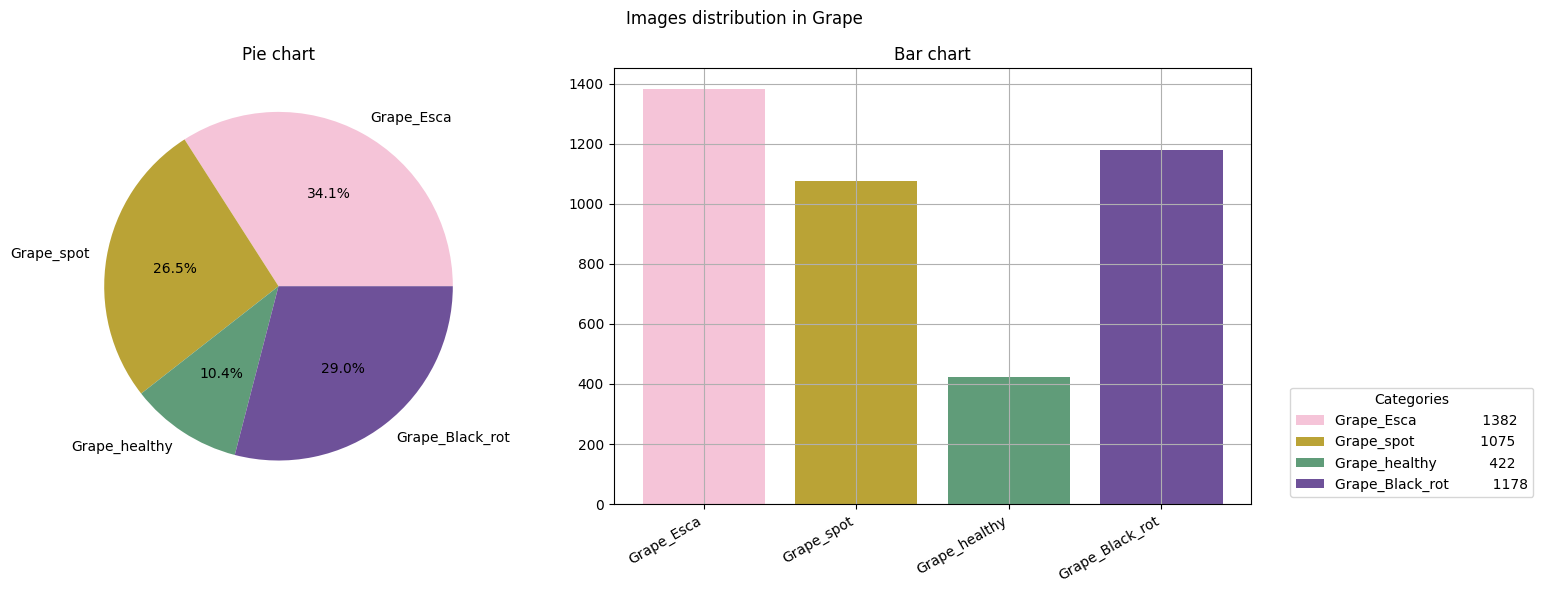

folder_statistics
	Grape_Esca : 1382
	Grape_spot : 1075
	Grape_healthy : 422
	Grape_Black_rot : 1178
total_augmentation_to_balance : 2954
root_path : ../dataset/Grape


In [15]:

def ft_distribution(target_path, totalVariants, plot_chart=False):
    all_images = ft_scrap_images(target_path)
    # all_images = ft_scrap_images(DATASET_PATH, DATASET_PATH)
    
    # print(f"Total of all images in {target_path}: {len(all_images)}")
    folders_stats = build_image_stats(all_images)
    parent_folder_name = next(iter(folders_stats))
    folders_stats = folders_stats[parent_folder_name]
    lowest = 9999999
    totalToAugment = 0
    result = {'folder_statistics': {}, 'total_augmentation_to_balance': 0, 'root_path': target_path, 'image_paths': {} }

    for subFolder in folders_stats:
        total_imgs = folders_stats[subFolder]
        if total_imgs  < lowest:
            lowest = total_imgs
        images_related_to_subfolder = [os.path.split(img)[1] for img in all_images if subFolder in img]
        head, _ = os.path.split(all_images[0])
        result['image_paths'][subFolder] = {}
        result['image_paths'][subFolder]['images'] = images_related_to_subfolder
        result['image_paths'][subFolder]['path_to_folder'] = head

    totalToAugment = totalVariants * lowest

    result['folder_statistics'] = folders_stats
    result['total_augmentation_to_balance'] = totalToAugment

    if plot_chart:
        plot_image_stats(title=parent_folder_name, stats=folders_stats)

    return result

distribution = ft_distribution(GRAPE_PATH, totalVariants=7, plot_chart=True)
# print(distribution)
del(distribution['image_paths'])
ft_print_pretty(distribution)

# 